<a href="https://colab.research.google.com/github/VihaanS22/API-/blob/main/Starify2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gTTS

Welcome back rocketeer! You have helped us in finishing our first module and getting a step closer to being the real heroes. As we know, our scraped data was made using units compared to different stars. Now we have to convert everything to solar units as we need a star nearly well as the sun. Upload both final_stars.csv that you scraped and the final_data.csv that has been provided by us. Use the first data to make a graph of the stars and the second to make the solar unit changes. Good Luck again!

Click on the play button ▶ below to get an audio intro. 🔽

In [ ]:
import gtts
from IPython.display import Audio

code = gtts.gTTS("Welcome back rocketeer! You have helped us in finishing our first module and getting a step closer to being the real heroes. As we know, our scraped data was made using units compared to different stars. Now we have to convert everything to solar units as we need a star nearly well as the sun. Upload both final_stars.csv that you scraped and the final_data.csv that has been provided by us. Use the first data to make a graph of the stars and the second to make the solar unit changes. Good Luck again!")
code.save("intro.mp3")
sound_file = 'intro.mp3'
Audio(sound_file, autoplay=True)

Uploading the files we need to make a graph and do the conversion.
Upload final_data.csv and final_stars.csv

You have already scraped the data into final_stars. Use that. And given below is the link to download the final_data.csv :-

[final_data.csv](https://drive.google.com/file/d/1keIvR12LmshS0wA9TEp7WrgGzJMdzucM/view)

🔽

In [ ]:
from google.colab import files

media = files.upload()
media = files.upload()

Saving final_stars.csv to final_stars (1).csv


Saving final_data.csv to final_data (1).csv


Importing csv, opening the uploaded final_stars file and printing some neccessary data. 🔽

In [ ]:
import csv

rows = []

with open("final_stars.csv") as f:
  reader = csv.reader(f)
  for i in reader:
    rows.append(i)

headers = rows[0]
star_data_rows = rows[1:]
headers[0] = "row_num"
print(headers)
print(star_data_rows[1])
print(len(star_data_rows))


['row_num', 'Star_name', 'Distance', 'Mass', 'Radius']
['1', 'Sirius', '0008.6', '2.1', '1.71']
254


Importing plotly express to make a scatter graph of gravities of all the stars data that we have. Making certain arrays to use them for plotting the graph.
Also using a formula to derive the gravity for later uses.


In [ ]:
import plotly.express as px

star_masses = []
star_radii = []
star_names = []

for row in star_data_rows :
  star_masses.append(row[3])
  star_radii.append(row[4])
  star_names.append(row[1])

star_gravity = []

for index, name in enumerate(star_names):
  try:
    gravity = (float(star_masses[index]) *1.989e+30) / (float(star_radii[index])*float(star_radii[index])) * 6.957e+8
  except:
    gravity = 0

  star_gravity.append(gravity)

fig = px.scatter(x = star_radii, y = star_masses, size = star_gravity, hover_data = [star_names])
fig.show()


Now reading the final_data i.e the new data we have given you.

In [ ]:
#pandas & dataframes are easier to use here because they have additional props and functions to help deal with such conflicts

import pandas as pd
df = pd.read_csv('final_data.csv')
#to check the data-types, you can use dtypes property
df.dtypes


Unnamed: 0      int64
Star_name      object
Distance       object
Mass          float64
Radius         object
dtype: object

Removing the problematic outliers one of which is comma. We then convert those values to float using lamda.
This will replace all the values that have the commas in between for eg: 1,184 will turn into 1184

In [ ]:
df['Radius']=df['Radius'].apply(lambda x: x.replace(',', '')).astype('float')
df['Distance']=df['Distance'].apply(lambda x: x.replace(',', '')).astype('float')


Converting the radius and mass into solar units. Km, Kg.

In [ ]:
radius = df['Radius'].tolist()
mass = df['Mass'].tolist()

#converting solar mass and radius into km & kg

for i in range(0,len(radius)-1):
    radius[i] = radius[i]*6.957e+8
    mass[i] = mass[i]*1.989e+30


Making a new col of gravity and implementing the converted, formulated values in it.

In [ ]:
gravity = []
G = 6.674e-11
for index in range(0,len(mass)):
    g= (mass[index]*G)/((radius[index])**2)
    gravity.append(g)

#creating the whole column with the calculated values
df["Gravity"] = gravity
df

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.000000,1.000000,2.742692e+02
1,1,Sirius,8.600000,2.100000,1.710000,1.969718e+02
2,2,Canopus,310.000000,15.000000,71.000000,8.161153e-01
3,3,Alpha Centauri,4.400000,1.100000,1.200000,2.095112e+02
4,4,Arcturus,37.000000,1.100000,26.000000,4.462960e-01
...,...,...,...,...,...,...
248,248,2MASSI J2356547-155310,74.000000,0.076367,0.112012,1.669385e+03
249,249,WISE 0410+1502,20.000000,0.005728,0.120233,1.086673e+02
250,250,WISE 0458+6434A,35.900000,0.014319,0.431605,2.108201e+01
251,251,WISE 0458+6434B,35.900000,0.009546,0.390499,1.716928e+01


Finally making a new file with the table appended in it. :)

/content/gravitative_stars.csv

Given above is the link to download the newly made file


In [ ]:
df.to_csv("gravitative_stars.csv")

Part 2 :-
You have now made the new file with gravitative stars that we can move to. We have to narrow down our hunt. Your work now is to plot some graphs on the newly obtained data. Good Luck!

In [ ]:
from google.colab import files
media = files.upload()

Saving gravitative_stars.csv to gravitative_stars.csv


Opening the new file and naming, printing some necessary rows and columns. 🔽

In [ ]:
import csv

rows = []

with open("gravitative_stars.csv") as f:
  reader = csv.reader(f)
  for i in reader:
    rows.append(i)

headers = rows[0]
grav_star_rows = rows[1:]
headers[0] = "row_num"
print(headers)
print(grav_star_rows[1])
print(len(grav_star_rows))

['row_num', 'Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius', 'Gravity']
['1', '1', 'Sirius', '8.6', '2.1', '1.71', '196.971799550325']
253


Code for plotting the graphs. Here importing plotly.express and making arrays to later append it with the particular rows.
Then making graphs one of Radius/Mass, another of Gravity Level/Mass and yet another of Gravity Level/Radii
 🔽

In [ ]:
import plotly.express as px

grav_masses = []
grav_radii = []
star_names = []
star_grav = []

for row in grav_star_rows :
  grav_masses.append(row[4])
  grav_radii.append(row[5])
  star_names.append(row[2])
  star_grav.append(row[6])

fig = px.scatter(x = grav_radii, y = grav_masses, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Radii",
                     "y": "Gravitative Stars - Masses"
                 },
                title="Gravitative Stars :- Radius/Mass")
fig.show()

fig = px.scatter(x = star_grav, y = grav_masses, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Gravity Level",
                     "y": "Gravitative Stars - Masses"
                 },
                title="Gravitative Stars :- Gravity/Mass")
fig.show()

fig = px.scatter(x = star_grav, y = grav_radii, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Gravity Level",
                     "y": "Gravitative Stars - Radii"
                 },
                title="Gravitative Stars :- Gravity/Radii")
fig.show()




/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



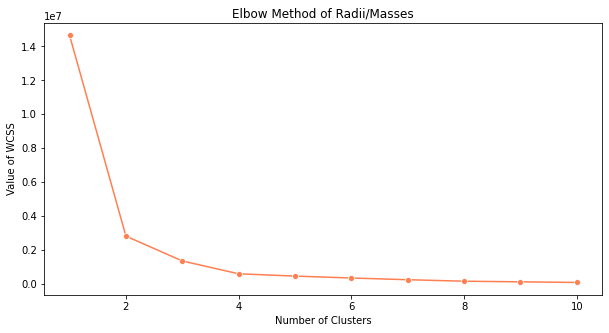

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



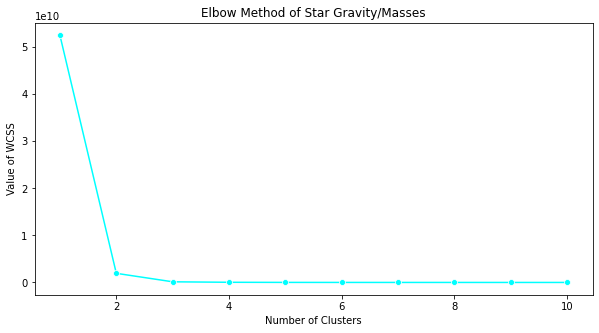

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



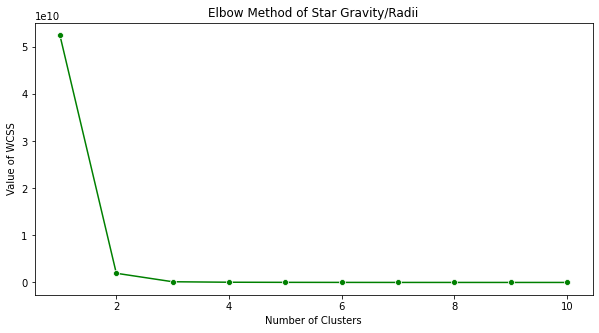

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

x = []

for index, mass in enumerate(grav_masses):
  temp_list = [grav_radii[index], mass]
  x.append(temp_list)

wcss = []

for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 4)
  k_means.fit(x)
  wcss.append(k_means.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "coral")
plt.title("Elbow Method of Radii/Masses")
plt.xlabel("Number of Clusters")
plt.ylabel("Value of WCSS")
plt.show()

y = []

for index, mass in enumerate(grav_masses):
  temp_list = [star_grav[index], mass]
  y.append(temp_list)

wcss = []

for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 4)
  k_means.fit(y)
  wcss.append(k_means.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "cyan")
plt.title("Elbow Method of Star Gravity/Masses")
plt.xlabel("Number of Clusters")
plt.ylabel("Value of WCSS")
plt.show()

z = []

for index, rad in enumerate(grav_radii):
  temp_list = [star_grav[index], rad]
  z.append(temp_list)

wcss = []

for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = "k-means++", random_state = 4)
  k_means.fit(z)
  wcss.append(k_means.inertia_)

plt.figure(figsize = (10,5))
sns.lineplot(range(1, 11), wcss, marker = "o", color = "green")
plt.title("Elbow Method of Star Gravity/Radii")
plt.xlabel("Number of Clusters")
plt.ylabel("Value of WCSS")
plt.show()

Making all three elbow graphs according to the clusters of the three graphs we made. 🔼

Part 3. Filtering out the stars so that we can narrow down our find.

The first code block you see is of the suitable distance we can get for our main star. We have 251 stars of suitable distance from earth.

The second code block is done individually again as you can see. Here we are applying a filter for suitable gravity in which we can survive. We have 253 stars which have suitable gravity.

The third code block is the filter which we have derived from the first suitable distance filter.
Here, we are checking the number of stars which are at a suitable distance and also have suitable gravity for us to sustain life.

We have now narrowed down our search to around 125 stars which are at a suitable distance and have suitable gravity for us the survive.

---
🔽

In [ ]:
suitable_distance = []

for row in grav_star_rows :
  if(float(row[4]) <= 100):
    suitable_distance.append(row)

print("We have", len(suitable_distance),"suitable stars which have a good distance for Earth's sustenance.")


We have 251 suitable stars which have a good distance for Earth's sustenance.


In [ ]:
suitable_grav = []

for i in grav_star_rows :
  if(float(row[6]) >= 150 or float(row[6]) <=350):
    suitable_grav.append(i)

print("We have", len(suitable_grav),"suitable stars which have a good gravity for Earth's sustenance.")


We have 253 suitable stars which have a good gravity for Earth's sustenance.


In [ ]:
filtered_stars = list(suitable_distance)

for i in filtered_stars :
  if(float(row[6]) <= 150 or float(row[6]) >=350):
    filtered_stars.remove(i)

print("We have", len(filtered_stars),"suitable stars which have a good distance and better gravity for Earth's sustenance.")

for i in filtered_stars:
  print(i[2])



We have 125 suitable stars which have a good distance and better gravity for Earth's sustenance.
Sirius
Alpha Centauri
Vega
Rigel
Betelgeuse
Hadar
Acrux
Antares
Pollux
Deneb
Regulus
Shaula
Gacrux
Elnath
Alnilam
Alnair
Alnitak
Mirfak
Sargas
Avior
Menkalinan
Alhena
Alsephina[2]
Polaris
Scheat
Rasalgethi
Delta Pavonis
V382 Carinae
Delta Cephei
Titawin
P Cygni
61 Cygni
Polaris Australis
54 Piscium
RW Cephei
V838 Monocerotis
II Pegasi
Pistol Star
UY Scuti
Luhman 16
KIC 8462852
VFTS 352
Gliese 1214
VB 10
TRAPPIST-1
WISE 0855−0714
SDSS J000013.54+255418.6 [de]
2MASS J00242463-0158201
2MASSW J0030300-145033
2MASS J00345157+0523050
2MASSW J0045214+163445
2MASS J00501994-3322402 [de]
2MASSI J0103320+193536
2MASSI J0117474-340325 [de]
SDSS J015141.69+124429.6
2MASS J02103857-3015313
2MASS J02411151-0326587 [de]
LP 771-21
2MASS J02535980+3206373
DEN 0255-4700
2MASS J03205965+1854233
SDSS J032553.17+042540.1
2MASS J03284265+2302051 [de]
LP 944-20
Teide 1
2MASS J03552337+1133437
2MASS J04285096-2253

Part 4. Making plots on the topics we have, to interpret results.
🔽

In [ ]:
import plotly.express as px

grav_masses = []
grav_radii = []
grav_distance = []
star_names = []
star_grav = []

for row in grav_star_rows :
  grav_masses.append(row[4])
  grav_radii.append(row[5])
  grav_distance.append(row[3])
  star_names.append(row[2])
  star_grav.append(row[6])

fig = px.bar(x = star_names, y = grav_masses, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Names",
                     "y": "Gravitative Stars - Masses"
                 },
                title="Gravitative Stars :- Star Names/Mass")
fig.show()

fig = px.bar(x = star_names, y = grav_radii, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Names",
                     "y": "Gravitative Stars - Radii"
                 },
                title="Gravitative Stars :- Star Names/Radii")
fig.show()

fig = px.bar(x = star_names, y = grav_distance, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Names",
                     "y": "Gravitative Stars - Distance"
                 },
                title="Gravitative Stars :- Star Name/Distance")
fig.show()

fig = px.bar(x = star_names, y = star_grav, color = star_names,
                 labels={
                     "x": "Gravitative Stars - Names",
                     "y": "Gravitative Stars - Gravity Level"
                 },
                title="Gravitative Stars :- Star Name/Gravity Level")
fig.show()



In [ ]:
catalog = []

for row in filtered_stars:
  temp_dict = {

    "star_name" : row[2],
    "suitable_distance" : row[3],
    "star_mass" : row[4],
    "star_radius" : row[5],
    "star_gravity" : row[6],

  }
  catalog.append(temp_dict)

print(catalog)
len(catalog)

[{'star_name': 'Sirius', 'suitable_distance': '8.6', 'star_mass': '2.1', 'star_radius': '1.71', 'star_gravity': '196.971799550325'}, {'star_name': 'Alpha Centauri', 'suitable_distance': '4.4', 'star_mass': '1.1', 'star_radius': '1.2', 'star_gravity': '209.51116500384123'}, {'star_name': 'Vega', 'suitable_distance': '25.0', 'star_mass': '2.2', 'star_radius': '2.7', 'star_gravity': '82.76984296448046'}, {'star_name': 'Rigel', 'suitable_distance': '860.0', 'star_mass': '23.0', 'star_radius': '78.9', 'star_gravity': '1.01332978543217'}, {'star_name': 'Betelgeuse', 'suitable_distance': '640.0', 'star_mass': '20.0', 'star_radius': '950.0', 'star_gravity': '0.006077986957552885'}, {'star_name': 'Hadar', 'suitable_distance': '390.0', 'star_mass': '10.5', 'star_radius': '8.6', 'star_gravity': '38.937617567949246'}, {'star_name': 'Acrux', 'suitable_distance': '320.0', 'star_mass': '18.0', 'star_radius': '8.9', 'star_gravity': '62.326030883377484'}, {'star_name': 'Antares', 'suitable_distance': '

125

In [ ]:
files.upload()

Saving bright_stars.csv to bright_stars.csv


{'bright_stars.csv': b',Star_name,Distance,Mass,Radius\r\n0,Sun,0.000015813,1,1\r\n1,Sirius,0008.6,2.1,1.71\r\n2,Canopus,0310,15,71\r\n3,Alpha Centauri,0004.4,1.1,1.2\r\n4,Arcturus,0037,1.1,26\r\n5,Vega,0025,2.2,2.7\r\n6,Capella,0043,2.6,12\r\n7,Rigel,0860,23,78.9\r\n8,Procyon,0011.4,1.5,1.9\r\n9,Betelgeuse,0640[1],20,950\r\n10,Achernar,0144,6.7,9.3\r\n11,Hadar,0390,10.5,8.6\r\n12,Altair,0017,1.8,1.8\r\n13,Acrux,0320,18,8.9\r\n14,Aldebaran,0065,1.5,44\r\n15,Antares,0600,12,680\r\n16,Spica,0260,11.43,7.47\r\n17,Pollux,0034,1.9,8.8\r\n18,Fomalhaut,0025,1.9,1.8\r\n19,Deneb,"2,600",19,203\r\n20,Mimosa,0350,16,8.4\r\n21,Regulus,0077,3.8,3.1\r\n22,Adhara,0430,12.5,14\r\n23,Shaula,0700,14.5,8.8\r\n24,Castor,0052,2.8,2.4\r\n25,Gacrux,0088,1.5,84\r\n26,Bellatrix,0240,8.6,5.8\r\n27,Elnath,0130,5.0,4.2\r\n28,Miaplacidus,0110,3.5,6.8\r\n29,Alnilam,"2,000",32,42\r\n30,Gamma Velorum,"01,100",9.0,6\r\n31,Alnair,0101,4.0,3.4\r\n32,Alioth,0081,2.9,4.2\r\n33,Alnitak,01050,33,20\r\n34,Dubhe,0120,4.25,30\

In [ ]:
import csv

rows = []

with open("bright_stars.csv") as f:
  reader = csv.reader(f)
  for i in reader:
    rows.append(i)

headers = rows[0]
brights_rows = rows[1:]
headers[0] = "row_num"
print(headers)
print(brights_rows[0])
print(len(brights_rows))



bright_catalog = []

for row in brights_rows:
  temp_dict = {

    "row_num" : row[0],
    "star_name" : row[1],
    "distance_from_earth" : row[2],
    "star_mass" : row[3],
    "star_radius" : row[4],


  }
  bright_catalog.append(temp_dict)

print(bright_catalog)

['row_num', 'Star_name', 'Distance', 'Mass', 'Radius']
['0', 'Sun', '0.000015813', '1', '1']
97
[{'row_num': '0', 'star_name': 'Sun', 'distance_from_earth': '0.000015813', 'star_mass': '1', 'star_radius': '1'}, {'row_num': '1', 'star_name': 'Sirius', 'distance_from_earth': '0008.6', 'star_mass': '2.1', 'star_radius': '1.71'}, {'row_num': '2', 'star_name': 'Canopus', 'distance_from_earth': '0310', 'star_mass': '15', 'star_radius': '71'}, {'row_num': '3', 'star_name': 'Alpha Centauri', 'distance_from_earth': '0004.4', 'star_mass': '1.1', 'star_radius': '1.2'}, {'row_num': '4', 'star_name': 'Arcturus', 'distance_from_earth': '0037', 'star_mass': '1.1', 'star_radius': '26'}, {'row_num': '5', 'star_name': 'Vega', 'distance_from_earth': '0025', 'star_mass': '2.2', 'star_radius': '2.7'}, {'row_num': '6', 'star_name': 'Capella', 'distance_from_earth': '0043', 'star_mass': '2.6', 'star_radius': '12'}, {'row_num': '7', 'star_name': 'Rigel', 'distance_from_earth': '0860', 'star_mass': '23', 'star

In [ ]:
files.upload()

Saving dwarf_stars.csv to dwarf_stars.csv


{'dwarf_stars.csv': b",Star_name,Distance,Mass,Radius\r\n0,SDSS J000013.54+255418.6\xc2\xa0[de],46.1,48,0.99\r\n1,2MASS J00040288-6410358,192,19,1.63\r\n2,LHS 102BC,,,\r\n3,2MASS J00242463-0158201,37.7,79,1.09\r\n4,2MASS J00250365+4759191AB,143,,\r\n5,2MASS J00274197+0503417,236,31,1.44\r\n6,2MASS J00275592+2219328,46.9,,\r\n7,2MASSW J0030300-145033,87.2,54,0.98\r\n8,2MASS J00332386-1521309\xc2\xa0[de],131,29,1.43\r\n9,2MASS J00345157+0523050,31,42,0.94\r\n10,2MASS 0036+1821,28.6,42,0.94\r\n11,2MASSW J0045214+163445,57,23,1.62\r\n12,WISEP J004701.06+680352.1\xc2\xa0[fr],40,12,1.3\r\n13,2MASS J00501994-3322402\xc2\xa0[de],34,40,0.94\r\n14,2MASS J00034227-2822410,,,\r\n15,2MASS J00584253-0651239\xc2\xa0[de],96,29,1.43\r\n16,CFBDS J005910.90\xe2\x80\x93011401.3,30,23,\r\n17,2MASSI J0103320+193536,70,52,0.98\r\n18,SDSSp J010752.33+004156.1\xc2\xa0[de],51,52,0.98\r\n19,2MASSI J0117474-340325\xc2\xa0[de],163,20,1.62\r\n20,2MASS J01415823-4633574\xc2\xa0[de],130,20,1.61\r\n21,SDSS J015141.69+

In [ ]:
rows = []

with open("dwarf_stars.csv") as f:
  reader = csv.reader(f)
  for i in reader:
    rows.append(i)

headers = rows[0]
dwarf_rows = rows[1:]
headers[0] = "row_num"
print(headers)
print(dwarf_rows[0])
print(len(dwarf_rows))



dwarf_catalog = []

for row in dwarf_rows:
  temp_dict = {

    "row_num" : row[0],
    "star_name" : row[1],
    "distance_from_earth" : row[2],
    "star_mass" : row[3],
    "star_radius" : row[4],


  }
  dwarf_catalog.append(temp_dict)

print(dwarf_catalog)

['row_num', 'Star_name', 'Distance', 'Mass', 'Radius']
['0', 'SDSS J000013.54+255418.6\xa0[de]', '46.1', '48', '0.99']
352
[{'row_num': '0', 'star_name': 'SDSS J000013.54+255418.6\xa0[de]', 'distance_from_earth': '46.1', 'star_mass': '48', 'star_radius': '0.99'}, {'row_num': '1', 'star_name': '2MASS J00040288-6410358', 'distance_from_earth': '192', 'star_mass': '19', 'star_radius': '1.63'}, {'row_num': '2', 'star_name': 'LHS 102BC', 'distance_from_earth': '', 'star_mass': '', 'star_radius': ''}, {'row_num': '3', 'star_name': '2MASS J00242463-0158201', 'distance_from_earth': '37.7', 'star_mass': '79', 'star_radius': '1.09'}, {'row_num': '4', 'star_name': '2MASS J00250365+4759191AB', 'distance_from_earth': '143', 'star_mass': '', 'star_radius': ''}, {'row_num': '5', 'star_name': '2MASS J00274197+0503417', 'distance_from_earth': '236', 'star_mass': '31', 'star_radius': '1.44'}, {'row_num': '6', 'star_name': '2MASS J00275592+2219328', 'distance_from_earth': '46.9', 'star_mass': '', 'star_r